In [1]:
!wget https://www.dropbox.com/s/4ihljz4uwbfkijk/dataset.zip?dl=0

--2020-05-21 17:15:00--  https://www.dropbox.com/s/4ihljz4uwbfkijk/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4ihljz4uwbfkijk/dataset.zip [following]
--2020-05-21 17:15:00--  https://www.dropbox.com/s/raw/4ihljz4uwbfkijk/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc219e6c102857bad285ab7b8194.dl.dropboxusercontent.com/cd/0/inline/A4JawUkfiPFQy32OKrba58WlkhEogS-YSR-aaM47UzZCTkD9wJg6CDOmAM3nZl9ACti52zhyp2J_qgEZI37IWhyWUze4Kl0vaBNRH1ee7pqOmOI_TXSlMP7ouxwVN_HKwZY/file# [following]
--2020-05-21 17:15:00--  https://uc219e6c102857bad285ab7b8194.dl.dropboxusercontent.com/cd/0/inline/A4JawUkfiPFQy32OKrba58WlkhEogS-YSR-aaM47UzZCTkD9wJg6CDOmAM3nZl9ACti52zhyp2J_qgEZI37IWhyWUze4Kl0vaBNRH1ee7pqOm

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: dataset/validation/Angry/8969.jpg  
 extracting: dataset/validation/Angry/9012.jpg  
 extracting: dataset/validation/Angry/9059.jpg  
 extracting: dataset/validation/Angry/9100.jpg  
 extracting: dataset/validation/Angry/9156.jpg  
 extracting: dataset/validation/Angry/9266.jpg  
 extracting: dataset/validation/Angry/9293.jpg  
 extracting: dataset/validation/Angry/9331.jpg  
 extracting: dataset/validation/Angry/9400.jpg  
 extracting: dataset/validation/Angry/9567.jpg  
 extracting: dataset/validation/Angry/9615.jpg  
 extracting: dataset/validation/Angry/966.jpg  
 extracting: dataset/validation/Angry/9691.jpg  
 extracting: dataset/validation/Angry/9698.jpg  
 extracting: dataset/validation/Angry/9715.jpg  
 extracting: dataset/validation/Angry/9748.jpg  
 extracting: dataset/validation/Angry/9785.jpg  
 extracting: dataset/validation/Angry/9802.jpg  
 extracting: dataset/validation/Angry/9811.jpg  
 extracting: datase

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

Using TensorFlow backend.


In [4]:
p = Path("./dataset/train/")

dirs = p.glob("*")


image_data_train = []
labels_train = []

#Optional
image_paths = []

label_dict = {"Angry":0,"Happy":1,"Neutral":2,"Sad":3,"Surprise":4}
label2face = {0:"Angry", 1:"Happy", 2:"Neutral", 3:"Sad", 4:"Surprise"}

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
        img_array = image.img_to_array(img)
        image_data_train.append(img_array)
        labels_train.append(label_dict[label])
        cnt += 1
        
    print(cnt)

dataset/train/Angry
3993
dataset/train/Sad
4938
dataset/train/Neutral
4982
dataset/train/Surprise
3205
dataset/train/Happy
7164


In [5]:
p = Path("./dataset/validation/")

dirs = p.glob("*")


image_data_test = []
labels_test = []

#Optional
image_paths = []

label_dict = {"Angry":0,"Happy":1,"Neutral":2,"Sad":3,"Surprise":4}
label2face = {0:"Angry", 1:"Happy", 2:"Neutral", 3:"Sad", 4:"Surprise"}

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
        img_array = image.img_to_array(img)
        image_data_test.append(img_array)
        labels_test.append(label_dict[label])
        cnt += 1
        
    print(cnt)

dataset/validation/Angry
960
dataset/validation/Sad
1139
dataset/validation/Neutral
1216
dataset/validation/Surprise
797
dataset/validation/Happy
1825


In [6]:
image_data_train[0].shape

(48, 48, 1)

In [0]:
import numpy as np

In [8]:
print(len(image_data_train))   #training images
print(len(labels_train))

24282
24282


In [9]:
print(len(image_data_test))   #testing images/samles/testing points
print(len(labels_test))

5937
5937


In [0]:
X_train = np.array(image_data_train)
Y_train = np.array(labels_train)

# shuffle
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=2)

#Normalisation
X_train = X_train/255.0

In [0]:
X_test = np.array(image_data_test)
Y_test = np.array(labels_test)

# shuffle
from sklearn.utils import shuffle
X_test,Y_test = shuffle(X_test,Y_test,random_state=2)

#Normalisation
X_test = X_test/255.0

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24282, 48, 48, 1)
(24282,)
(5937, 48, 48, 1)
(5937,)


In [0]:
# Draw some faces
def drawImg(img,label):
    plt.title(label2face[label])
    plt.imshow(img.reshape(48,48))
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

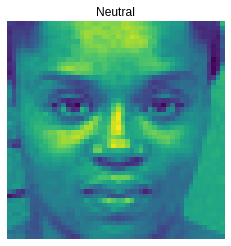

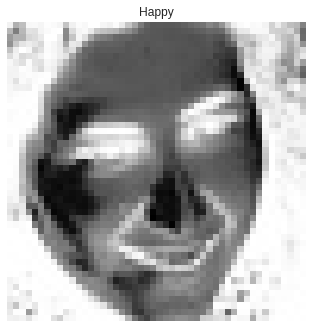

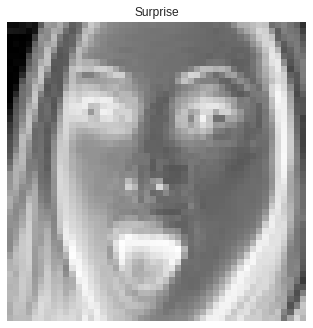

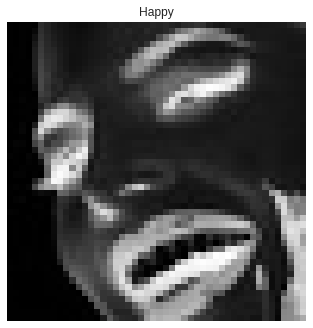

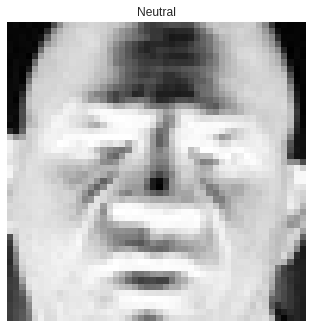

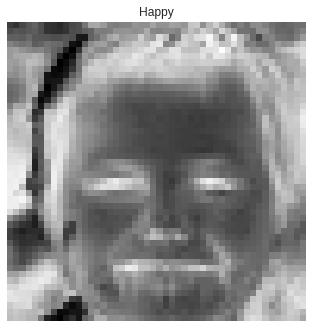

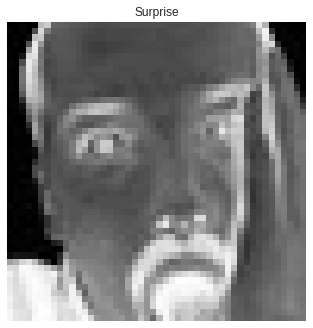

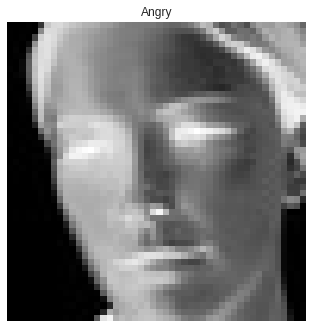

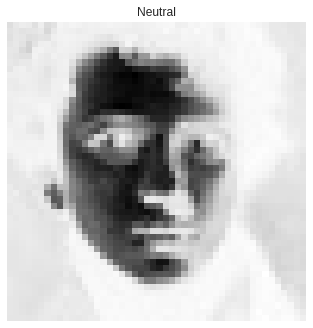

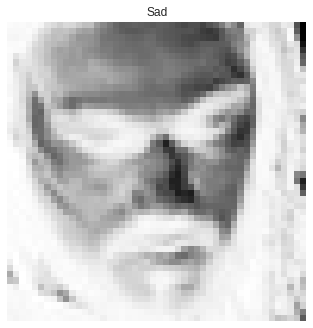

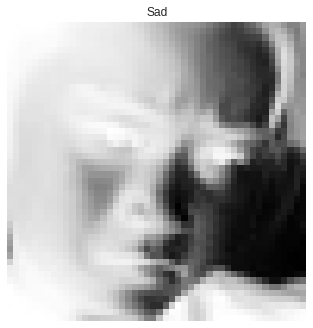

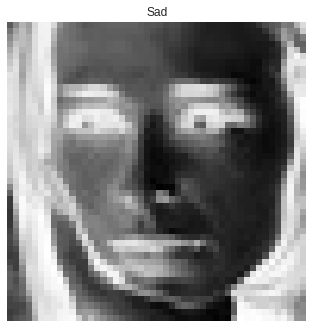

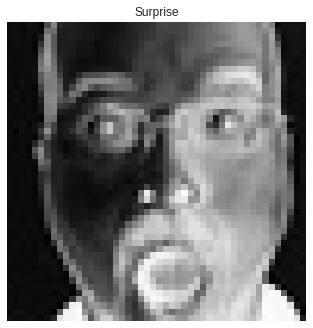

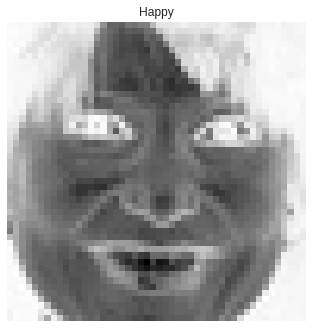

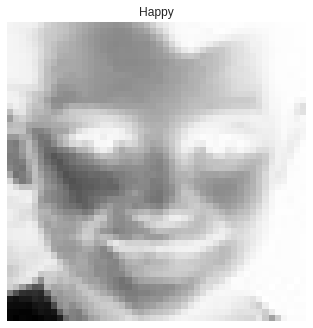

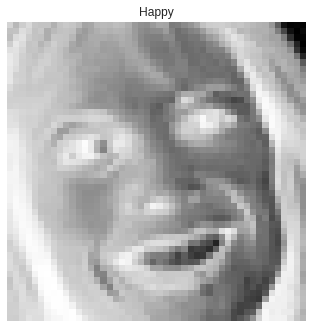

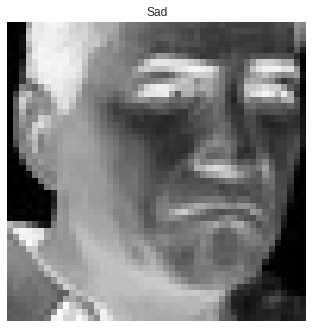

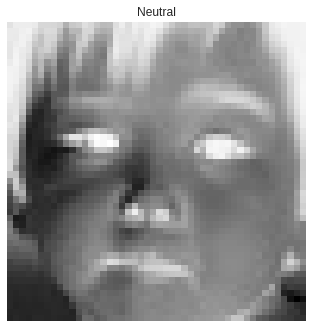

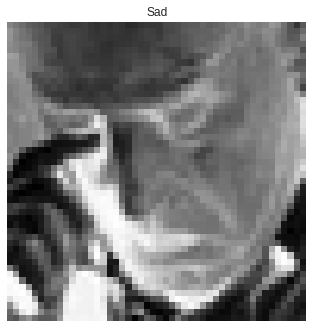

In [14]:
for i in range(1,20):
    drawImg(X_train[i],Y_train[i])  

In [15]:
type(X_test)

numpy.ndarray

In [16]:
M = X_train.shape[0]    # to convert in 2-d data
X_train = X_train.reshape(M,-1)
print(X_train.shape)
print(Y_train.shape)

(24282, 2304)
(24282,)


In [17]:
M = X_test.shape[0] 
X_test = X_test.reshape(M,-1)
print(X_test.shape)
print(Y_test.shape)

(5937, 2304)
(5937,)


In [0]:
X_train = X_train[ : 12141]   #50 % samples 
Y_train = Y_train[ : 12141]

In [0]:
X_test = X_test[ : 2500]
Y_test = Y_test[ :2500]

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12141, 2304)
(12141,)
(2500, 2304)
(2500,)


# SVM

In [0]:
from sklearn import svm

In [0]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [0]:
from time import time

In [0]:
start=time()

svm_classifier.fit(X_train,Y_train)  #training

end = time()

In [0]:
total_time_taken = end-start

In [26]:
total_time_taken

777.4549531936646

In [27]:
svm_classifier.score(X_test,Y_test)   #we calculate the testing score/acccuracy

0.4044

In [28]:
svm_classifier.score(X_train,Y_train)  # training score

0.7149328720863191

# overfitting case:- svm

#  KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model=KNeighborsClassifier()

In [32]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
model.score(X_test,Y_test)

0.3552

In [34]:
model.score(X_train,Y_train)

0.5594267358537188

# naive bayes

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [0]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [0]:
start=time()

mnb.fit(X_train,Y_train)

end = time()

In [38]:
end-start

0.14801311492919922

In [0]:
start=time()

gnb.fit(X_train,Y_train)

end = time()

In [40]:
end-start

0.17441296577453613

In [41]:
start=time()

print(mnb.score(X_test,Y_test))   ## mnb test acc

end = time()

0.3136


In [42]:
end-start

0.03373098373413086

In [43]:
start=time()

print(mnb.score(X_train,Y_train))   # mnb training acc

end = time()

0.30368173956016803


In [44]:
end-start

0.13650155067443848

In [45]:
start=time()

print(gnb.score(X_test,Y_test))    # gnb test acc

end = time()

0.2932


In [46]:
end-start

0.15466976165771484

In [47]:
start=time()
 
print(gnb.score(X_train,Y_train))    # gnb training acc
   
end = time()

0.277489498393872


In [0]:
from sklearn.model_selection import cross_val_score


In [50]:
cross_val_score(gnb,X_test,Y_test,scoring="accuracy",cv=10).mean()

0.2836

In [51]:
cross_val_score(gnb,X_train,Y_train,scoring="accuracy",cv=10).mean()

0.274359292479373

In [52]:
cross_val_score(mnb,X_test,Y_test,scoring="accuracy",cv=10).mean()

0.29359999999999997

In [53]:
cross_val_score(mnb,X_train,Y_train,scoring="accuracy",cv=10).mean()

0.29635032982827236

# logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(max_iter=5000)

In [0]:
start = time()
logisticRegr.fit(X_train, Y_train)
end = time()

In [76]:
end-start

388.51599287986755

In [77]:
logisticRegr.score(X_test, Y_test)

0.4024

In [78]:
logisticRegr.score(X_train, Y_train)

0.6423688328803229

2000